# Simulación en Python del experimento de la doble rendija

## Librería a utilizar:

In [5]:
# Librería NumerosComplejosLib.py

'''
INTRODUCCIÓN:La interferencia es un efecto que muestran las ondas cuando interactúan entre sí. Si dos (o más) ondas tienen la misma 
longitud de onda y una relación de fase fija, se denominan "coherentes". Y si estas ondas coherentes inciden en el 
mismo punto, pueden apoyarse entre sí, aniquilarse entre sí (sí, has leído bien: luz + luz = más luz o ninguna luz) 
o algo intermedio, dependiendo de su diferencia de fase. Lo especial de la luz láser es su enorme longitud de 
coherencia, lo que significa que la luz emitida por un láser es prácticamente siempre coherente. Una rendija 
doble (o mejor, una red) divide el haz láser en dos (o muchos) "haces". Más allá de la rendija doble o red, cada 
nuevo "haz" se propaga en todas las direcciones interfiriendo con el otro(s). Esto crea un patrón característico 
de máximos y mínimos. El experimento de la doble rendija es uno de los experimentos más famosos y fascinantes de 
la física cuántica.

EXPLICACIÓN:
1. Configuración del experimento:
 - Imagina una pantalla con dos rendijas estrechas y paralelas.
 - Detrás de esta pantalla, hay otra pantalla donde se registran los impactos de partículas (como electrones o fotones).

2. Comportamiento de las partículas:
   - Si lanzamos partículas una a una hacia las rendijas, podríamos esperar que pasen por una rendija o la otra, como si fueran pequeñas bolas.
   - Sin embargo, cuando no observamos por cuál rendija pasa cada partícula, en la pantalla de registro aparece un patrón de interferencia, similar al que producen las ondas de agua cuando pasan por dos rendijas⁴.

3. Interferencia de ondas:
   - Este patrón de interferencia sugiere que las partículas se comportan como ondas, interfiriendo entre sí al pasar por ambas rendijas simultáneamente.
   - Las crestas y los valles de estas ondas se suman o se cancelan, creando franjas brillantes y oscuras en la pantalla de registro⁵.

4. Observación y colapso de la onda:
   - Si colocamos detectores para observar por cuál rendija pasa cada partícula, el patrón de interferencia desaparece.
   - En su lugar, vemos dos bandas correspondientes a las dos rendijas, como si las partículas se comportaran como pequeñas bolas nuevamente⁵.

5. Conclusión:
   - El experimento muestra la dualidad onda-partícula: las partículas pueden comportarse como ondas o como partículas, dependiendo de si las observamos o no.
   - También resalta la naturaleza probabilística de la mecánica cuántica, donde el acto de observar puede cambiar el resultado del experimento⁷.

Por otro lado tenemos que se genera una interferencia constructiva o destructiva.

Este experimento desafía nuestra intuición clásica y ha sido fundamental para el desarrollo de la física cuántica.

'''

import math

def sumaC(m, d):
    return (m[0] + d[0], m[1] + d[1])

def productoC(m ,d):
    posicionX = (m[0]*d[0])-(m[1]*d[1])
    posicionY = (m[0]*d[1])+(d[0]*m[1])
    return (posicionX, posicionY)

def restaC(m, d):
    return (m[0]-d[0], m[1]-d[1])

def divisionC(m, d):
    denominador = (d[0]**2) + (d[1]**2)
    pReal = ((m[0]*d[0]) + (m[1]*d[1]))/denominador
    pImg = ((d[0]*m[1])-(m[0]*d[1]))/denominador
    return (pReal, pImg)

def moduloC(num):
    a = num[0]**2
    b = num[1]**2
    return math.sqrt(a+b)

def conjugadoC(num):
    return (num[0], num[1]*-1)

def faseC(num):
    fase = math.atan2(num[1],num[0])
    return fase

def representacionPolarC(num):
    return moduloC(num),faseC(num)

def representacionCartesianaC(num):
    a = num[0]*math.cos(num[1])
    b = num[0]*math.sin(num[1])
    return a, b


## Simulación

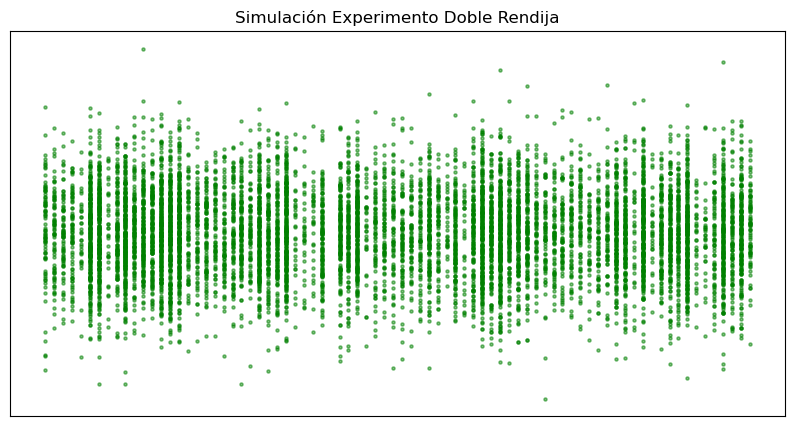

In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt

def calcularProbabilidades(amplitud1, amplitud2, posiciones):
    probabilidades = []

    for i in posiciones:
        # Variar la fase de cada rendija según la posición 
        fase1 = (math.cos(i), math.sin(i))
        fase2 = (math.cos(i + math.pi), math.sin(i + math.pi))

        # Calcular la amplitud total de la interferencia en el punto
        interferencia1 = productoC(amplitud1, fase1)
        interferencia2 = productoC(amplitud2, fase2)
        amplitudTotal = sumaC(interferencia1, interferencia2)

        # Calcular la probabilidad (módulo al cuadrado de la amplitud)
        probabilidad = moduloC(amplitudTotal)**2
        probabilidades.append(probabilidad)

    # Las probabilidades deben sumar 1
    probabilidades = np.array(probabilidades)
    probabilidades /= np.sum(probabilidades)  # Normalizar para que sumen 1

    return probabilidades

def generarParticulas(probabilidades, posiciones, numParticulas):
    # Definir las listas de las posiciones X y Y de las partículas generadas (en base a las probabilidades)
    particulasX = []
    particulasY = []
    # Para cada posición hay que añadir partículas en proporción a la probabilidad que hay
    for i in range(len(posiciones)):
        numParticulasPunto = int(probabilidades[i] * numParticulas)
        particulasX.extend([posiciones[i]] * numParticulasPunto)
        particulasY.extend(np.random.normal(0, 0.1, numParticulasPunto)) 

    return particulasX, particulasY

def graficarParticulas(particulasX, particulasY):
    plt.figure(figsize=(10, 5))
    plt.scatter(particulasX, particulasY, s=5, color="green", alpha=0.5)
    plt.title("Simulación Experimento Doble Rendija")
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.show()

def dobleRendija():
    # Definir la lista de posiciones
    posiciones = np.linspace(-math.pi, math.pi, 80)

    # Las amplitudes de probabilidad para las dos rendijas (números complejos en el plano cartesiano)
    amplitud1 = (1/math.sqrt(2), 0)
    amplitud2 = (1/math.sqrt(2), 0)

    # Calcular probabilidades de interferencia en la pantalla
    probabilidades = calcularProbabilidades(amplitud1, amplitud2, posiciones)

    # Generar las posiciones de las partículas (fotones o electrones)
    particulasX, particulasY = generarParticulas(probabilidades, posiciones, 10000)

    # Graficar las partículas
    graficarParticulas(particulasX, particulasY)

dobleRendija()
